In [1]:
using LinearAlgebra 
using Kronecker
using MKL
using Plots, PyPlot
using Random, Distributions
using RandomMatrices
using Statistics



(process:12352): GLib-GIO-WARNING **: 11:21:15.775: Unexpectedly, UWP app `KDEe.V.Okular_22.801.1132.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs


In [31]:
# function for creating Lattice:

function Lattice(L)
    Lat=floor.(2*rand(L,L));
    Lat
end


Lattice (generic function with 1 method)

In [32]:
Lat1=Lattice(5)

5×5 Matrix{Float64}:
 0.0  1.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0
 1.0  1.0  0.0  0.0  1.0
 1.0  0.0  1.0  0.0  0.0
 0.0  1.0  0.0  1.0  0.0

In [42]:
function flip(beta)
    Str=fill(0.1,5);
    Str[1]=exp(-beta(-8)); #neighor all opposite
    Str[1]=exp(-beta(-4)); #1 neighor opposite
    Str[1]=exp(-beta(0)); # 2 neighbor same
    Str[1]=exp(-beta(4)); #1 neighbor same
    Str[1]=exp(-beta(8)); #neighor all same
    
    Str
end


flip (generic function with 1 method)

In [75]:
N=500;
L= 16;
Beta=1/4;

Lat1=Lattice(L)

   # mag=fill(0.1,N);
    energy=fill(0.1,N)
    
    nin=0;
    nmean=0;
    
    for t in 1:N
        Xt=rand(2:(L-1))
        Yt=rand(2:(L-1))
        
    
    if Lat1[Xt,Yt]==1.0
        flipspin=0.0;
    end
    
    if Lat1[Xt,Yt]==0.0
        flipspin=1.0;
    end
        
    
    Nbd=(flipspin-Lat1[Xt,Yt])*(Lat1[Xt+1,Yt]+Lat1[Xt-1,Yt]+Lat1[Xt,Yt+1]+Lat1[Xt,Yt-1]);
    p= exp(-Beta*Nbd);
    
    jp=rand()[1]

    if jp<p  #The Metropolis Step
        Lat1[Xt,Yt]=flipspin;
    end
    
    
    en=0.0
    enmean=0.0;
    magmean=0.0;
    
    for i in 1:(L-1)
    for j in 1:(L-1)
        en=en-(Lat1[i,j]*Lat1[i+1,j]+Lat1[i,j]*Lat1[i,j+1]);
        end
    end
    
    magt=mean(Lat1);
    
    enmean=(enmean+en)/t
    magmean=(magmean+magt)/t
    
    
    mag4[t]=magmean;
    energy[t]=enmean;
    
end
    

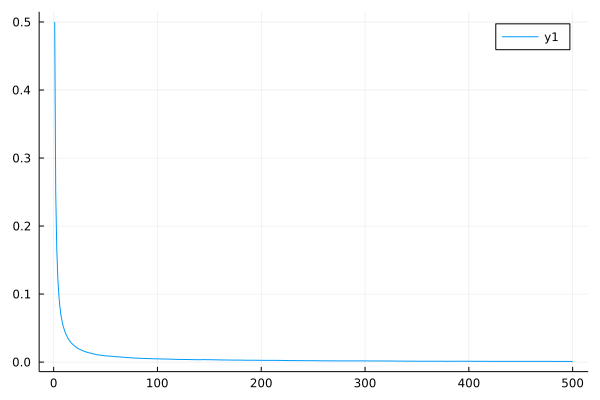

In [63]:
#Plots for beta=0.0

xax = collect(1:N)
Plots.plot(xax,mag)


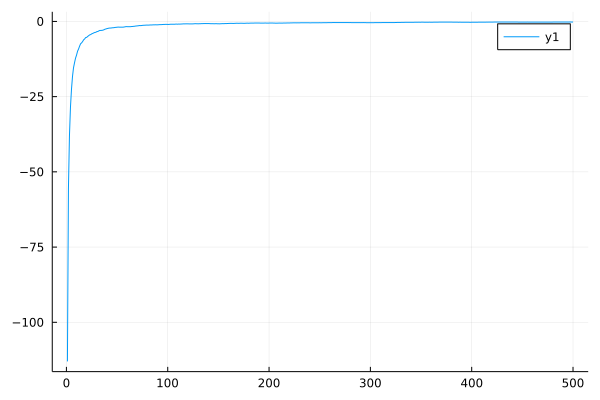

In [64]:
Plots.plot(xax,energy)

In [65]:
    mag1=fill(0.1,N);
    mag2p4=fill(0.1,N);
    mag4=fill(0.1,N);
  


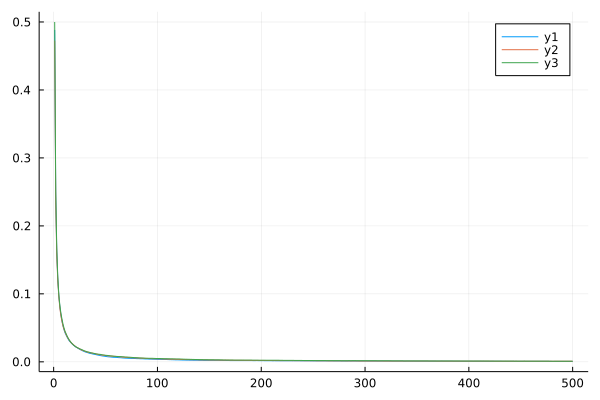

In [76]:
xax = collect(1:N)
Plots.plot(xax,mag1)
Plots.plot!(xax,mag2p4)
Plots.plot!(xax,mag4)
